## **Import Libraries and Dataset**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
# Read csv file
creditcard_df = pd.read_csv('/content/CC GENERAL.csv')


In [5]:
# read first 5 rows
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# number of rows and columns
creditcard_df.shape

(8950, 18)

In [7]:
# basic info in dataset
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
#sum of all the null values in each feature column
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [9]:
# statictical information on each feature column
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Questions to answer on data**

In [10]:
# Q1: Customer who made the maximum  "ONEOFF_PURCHASES"

creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
# Q2: Customer who has the maximum "Balance"
creditcard_df[creditcard_df['BALANCE'] == 19043.138560]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.0,1.0,0.75,1.0,0.0,0,216,18000.0,23018.57583,18621.01331,0.0,12


In [12]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# **Visualize Dataset**

<Axes: >

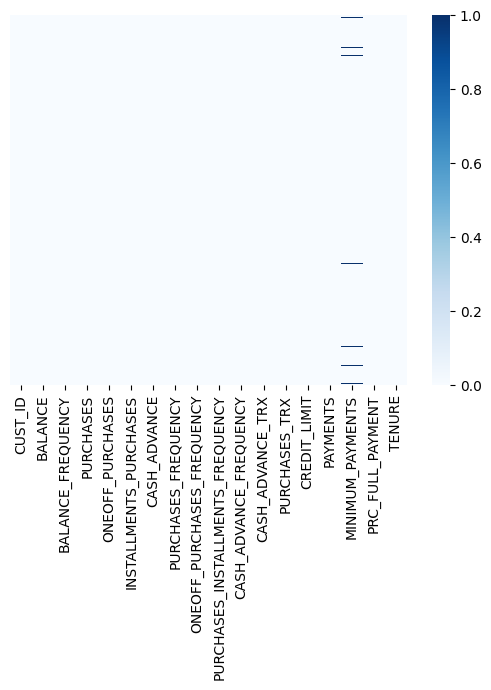

In [13]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False, cmap='Blues')

In [14]:
#sum of all the null values in each feature column
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [15]:
#replacing null values in minimum payments with the mean of the column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()== True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [16]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [17]:
# replacing null values in the credit limit column with the mean
creditcard_df['CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].median())

In [18]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


<Axes: >

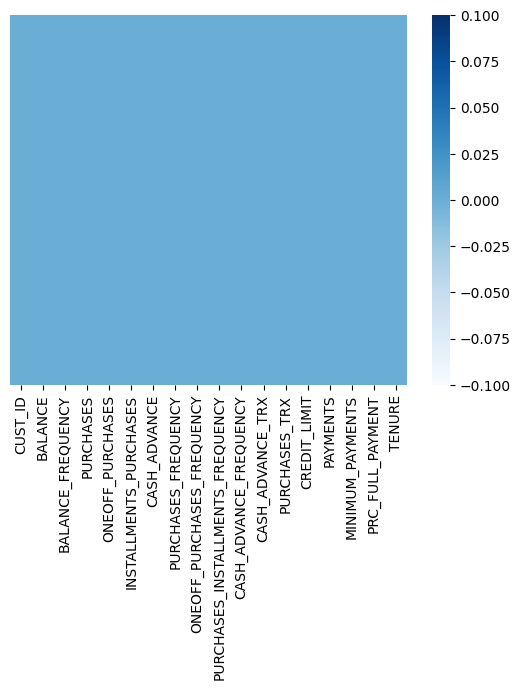

In [19]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False, cmap='Blues')

In [20]:
# check duplicate entries in the dataset
creditcard_df.duplicated().sum()

np.int64(0)

In [21]:
# drop unnecessary columns
creditcard_df.drop('CUST_ID', axis=1, inplace= True)

In [22]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
creditcard_df.shape

(8950, 17)

In [24]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/tmp/ipython-input-3394162644.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color': 'b','lw': 3,'label':'KDE'}, hist_kws ={'color':'g'})
/tmp/ipython-input-3394162644.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditc

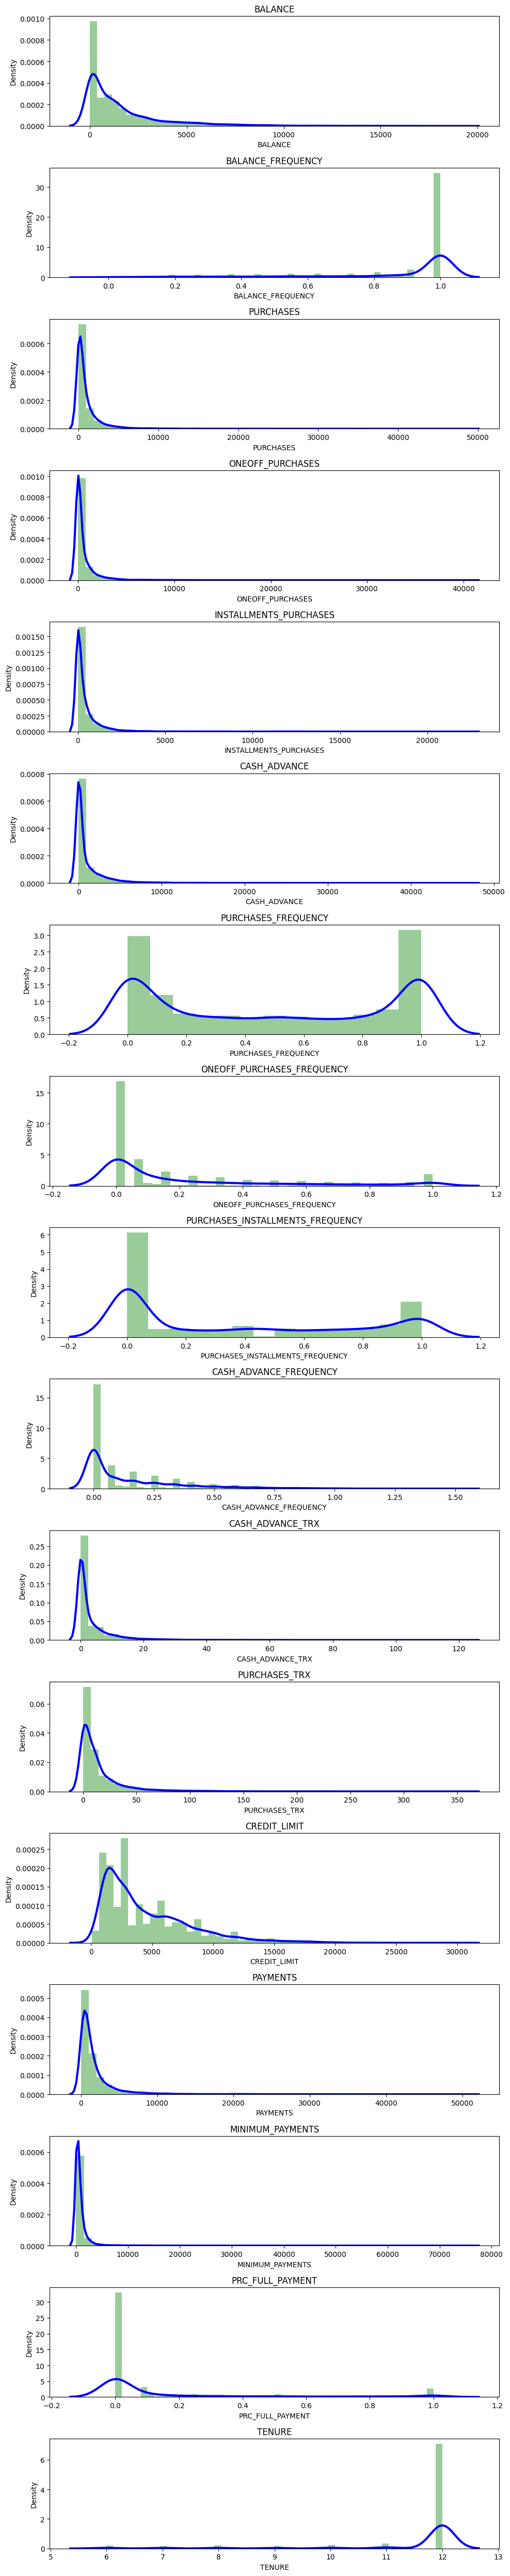

In [25]:
# displot visualisation

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color': 'b','lw': 3,'label':'KDE'}, hist_kws ={'color':'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [26]:
# correlation between features
correlation = creditcard_df.corr()

<Axes: >

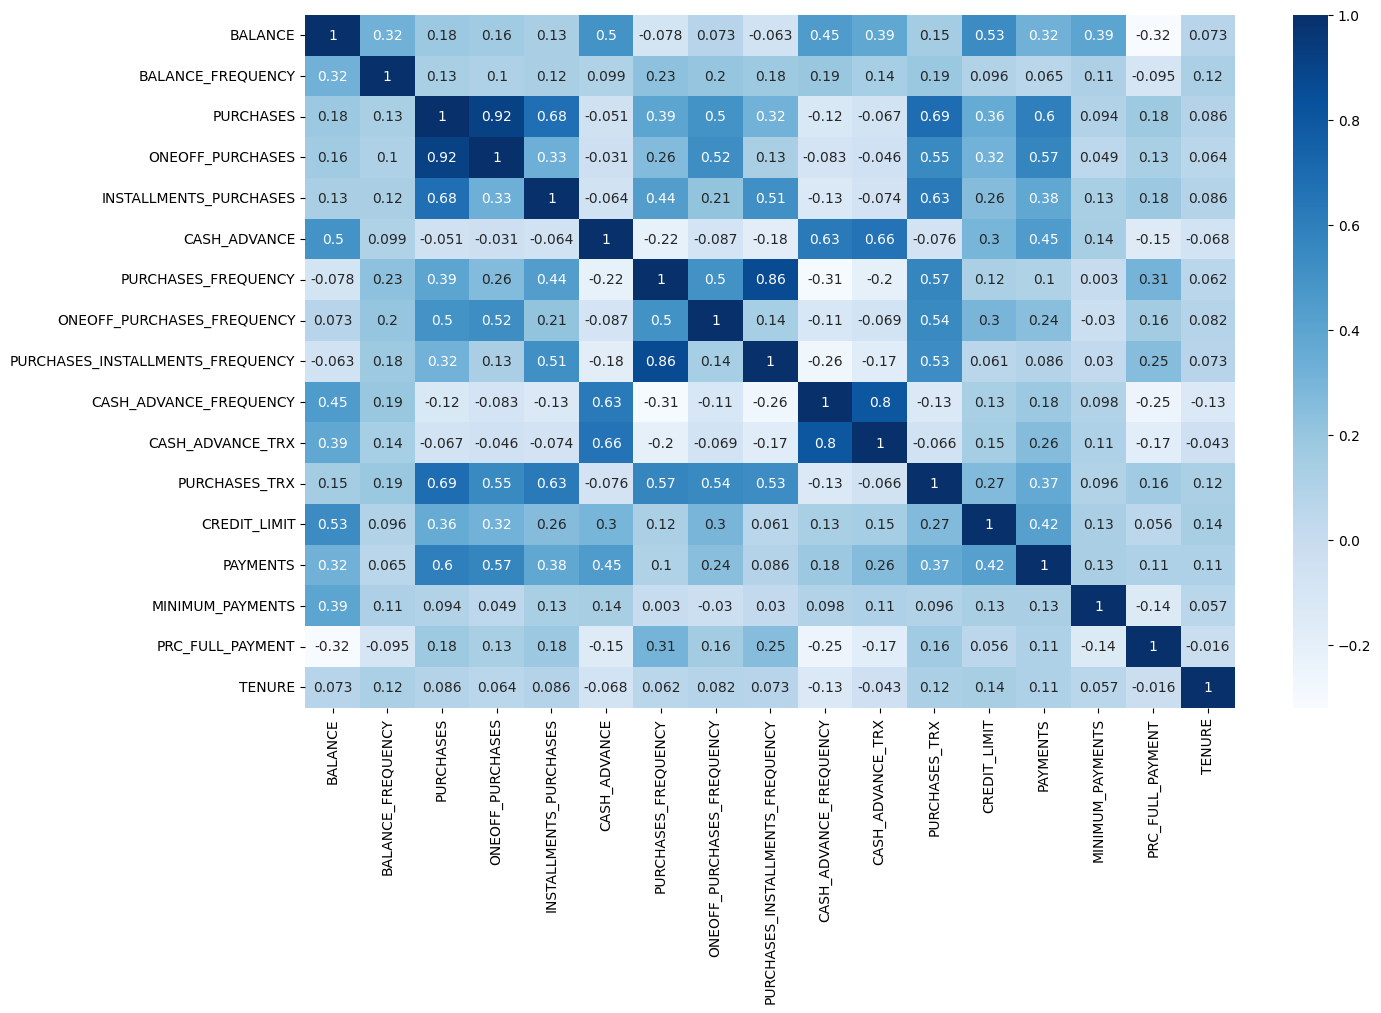

In [27]:
f,ax = plt.subplots(figsize=(15,9))
sns.heatmap(correlation,annot=True, cmap='Blues')

# **Model - KMeans algorithm**

In [28]:
# scale dataset
scaler = StandardScaler()
creditcard_df_s = scaler.fit_transform(creditcard_df)

In [29]:
creditcard_df_s.shape

(8950, 17)

In [30]:
creditcard_df_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

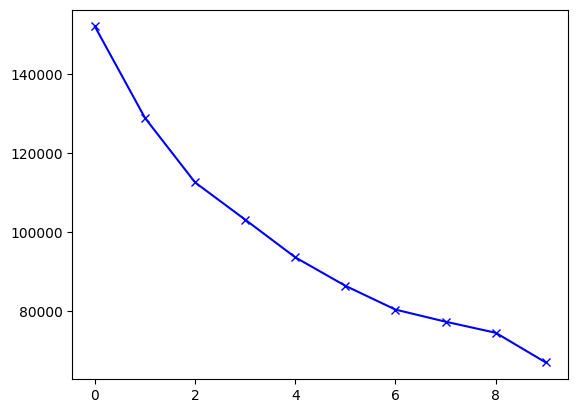

In [31]:
# getting the number of clusters - elbow method
scores =[]
for  i in range(1,11):
  KMean = KMeans(n_clusters=i)
  KMean.fit(creditcard_df_s)
  scores.append(KMean.inertia_)

plt.plot(scores,'bx-')



Optimal number of cluster : 3

In [32]:
## Apply the kmeans algorithm

Kmeans = KMeans(3)
Kmeans.fit(creditcard_df_s)

label = Kmeans.labels_

In [33]:

Kmeans.cluster_centers_.shape

(3, 17)

In [34]:
cluster_centers = pd.DataFrame(data=Kmeans.cluster_centers_,columns = [creditcard_df.columns])

In [35]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.974031,0.449490,2.319025,1.993733,1.820267,0.232517,1.133192,1.653331,1.041169,-0.027504,0.115583,2.353257,1.348466,1.640806,0.498030,0.313983,0.295507
1,0.178996,-0.132509,-0.354216,-0.237464,-0.401196,0.288156,-0.865288,-0.397518,-0.764925,0.423669,0.303004,-0.484464,-0.069950,-0.075254,0.026818,-0.390146,-0.089784
2,-0.375732,0.075491,0.008327,-0.070436,0.149033,-0.373650,0.804938,0.173680,0.704751,-0.485419,-0.370584,0.153096,-0.152531,-0.197008,-0.117253,0.397034,0.052717


In [36]:
## reverse scaled data

cluster_centers = scaler.inverse_transform(cluster_centers)

cluster_centers = pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3591.838396,0.983751,5957.836632,3901.625940,2057.112947,1466.471112,0.945155,0.695678,0.778225,0.129640,4.037594,73.203008,9400.601504,6483.115198,2024.843951,0.245549,11.912782
1,1937.039354,0.845881,246.417410,198.296296,48.270990,1583.148021,0.143069,0.083870,0.060437,0.219925,5.316607,2.667867,4239.773750,1515.292227,926.704116,0.039604,11.397165
2,782.419756,0.895154,1020.995295,475.528373,545.836769,195.309388,0.813411,0.254270,0.644524,0.038007,0.719865,18.515230,3939.305802,1162.824059,590.953979,0.269840,11.587868


In [37]:
y = Kmeans.fit_predict(creditcard_df_s)
y

array([1, 1, 2, ..., 2, 1, 1], dtype=int32)

In [38]:
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'cluster': label})],axis=1)

creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [39]:
# Count of rows in each cluster
creditcard_df_cluster['cluster'].value_counts()

,count
cluster,
1,4450
2,3835
0,665


# Visualization

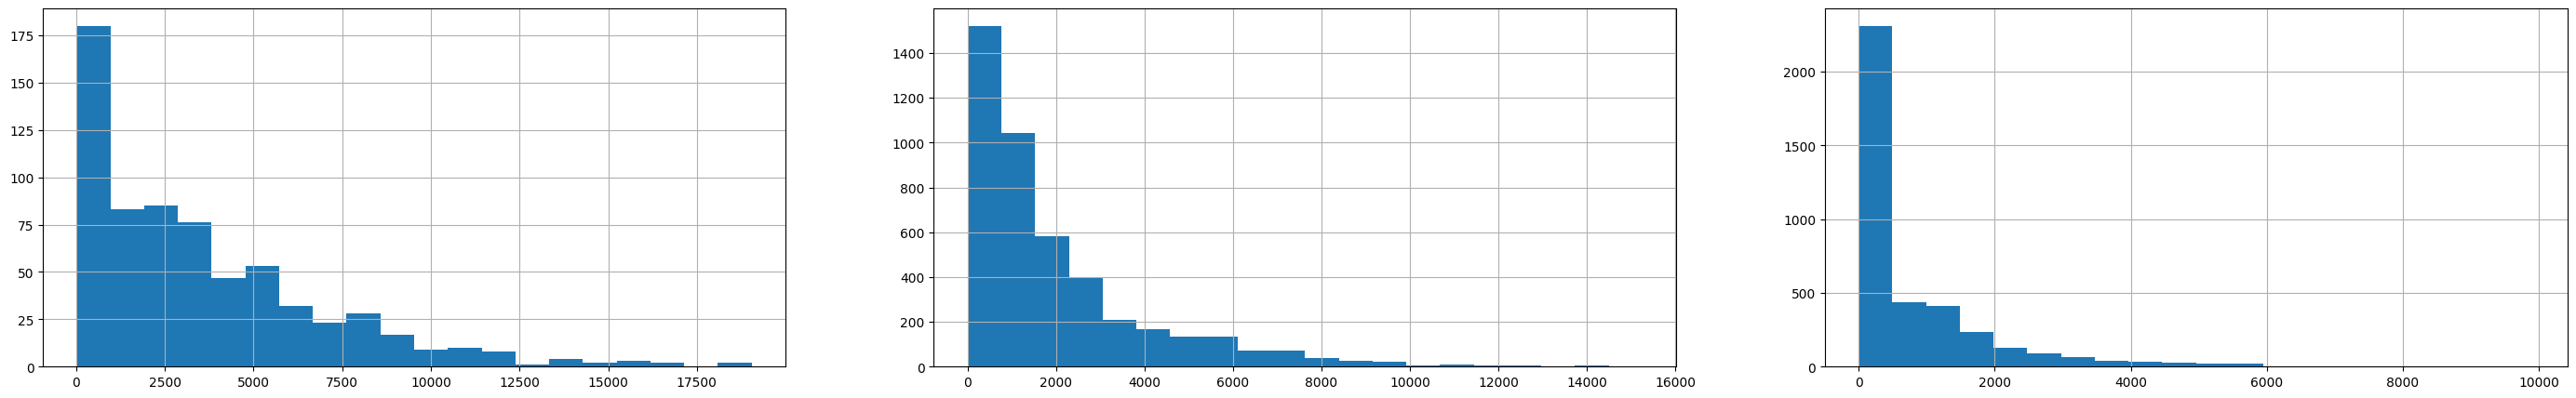

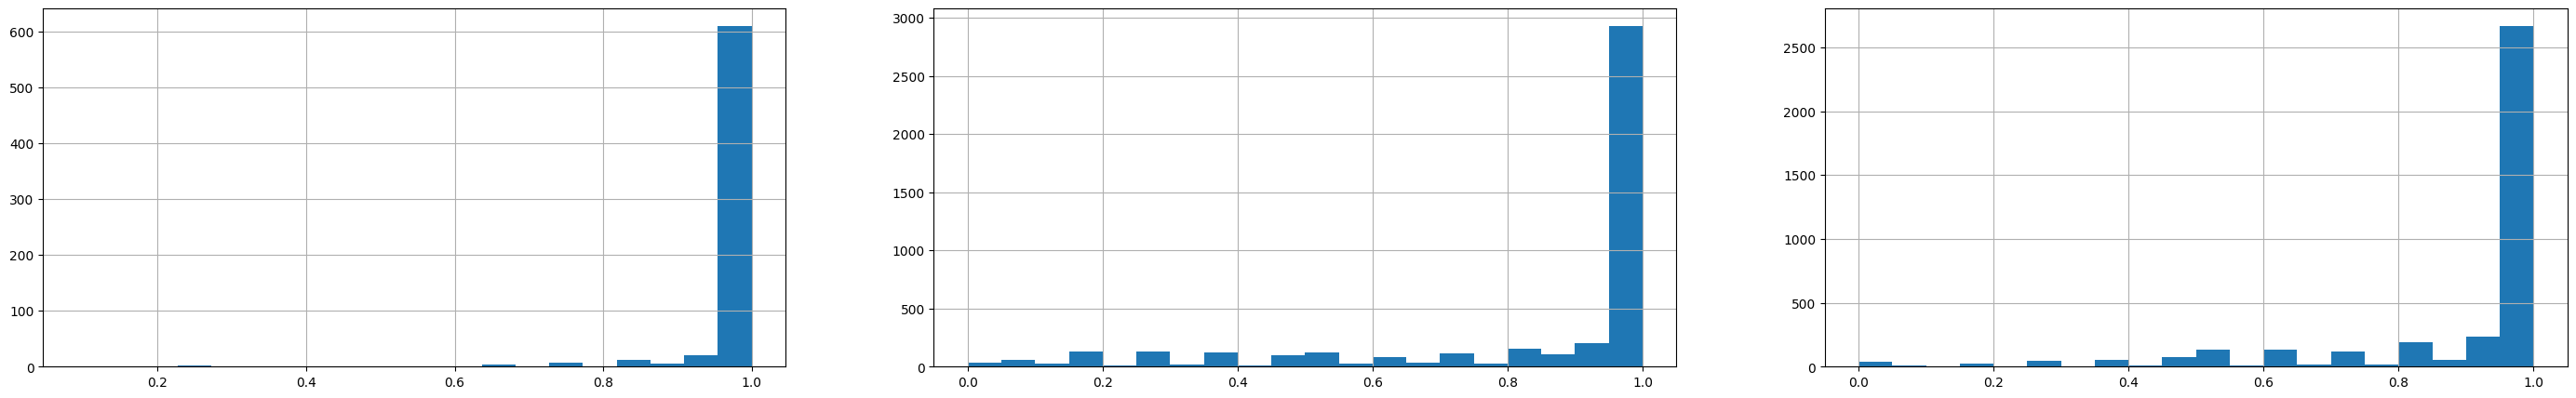

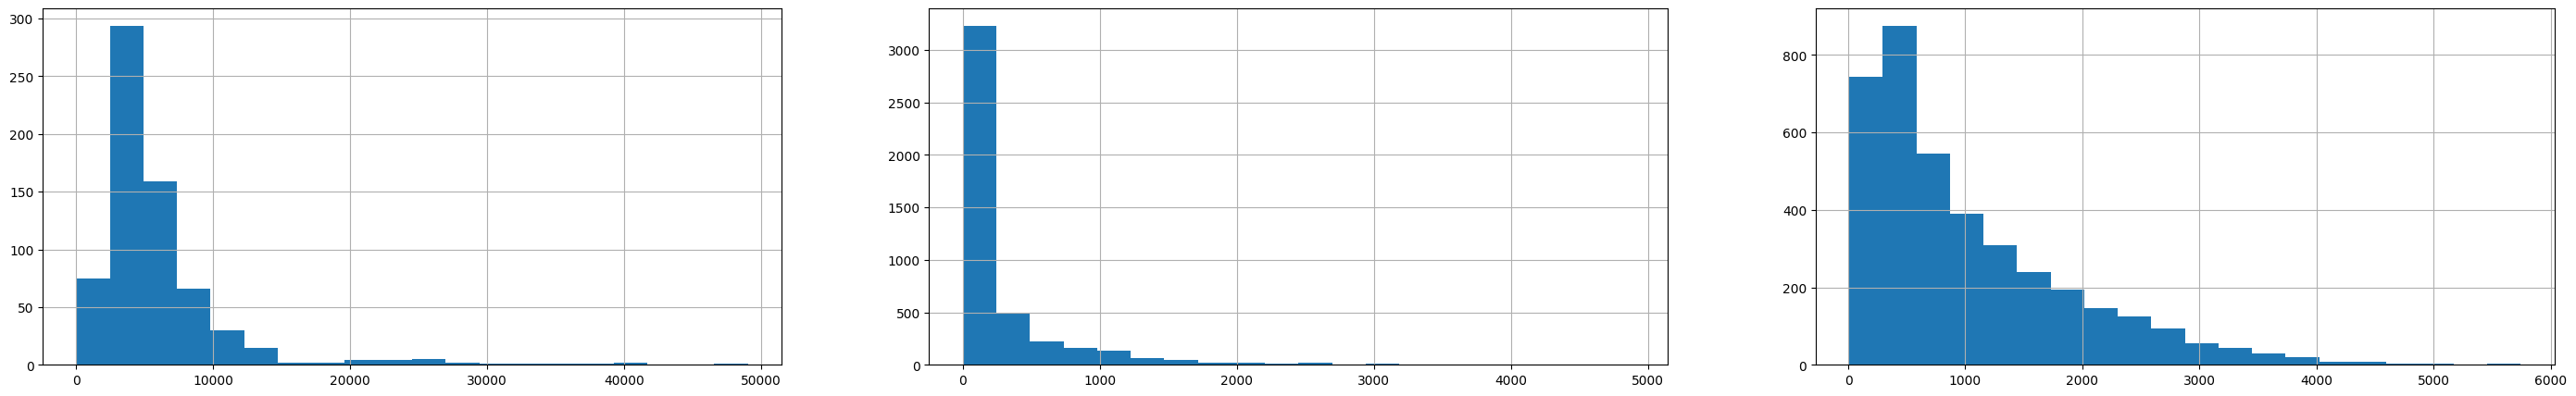

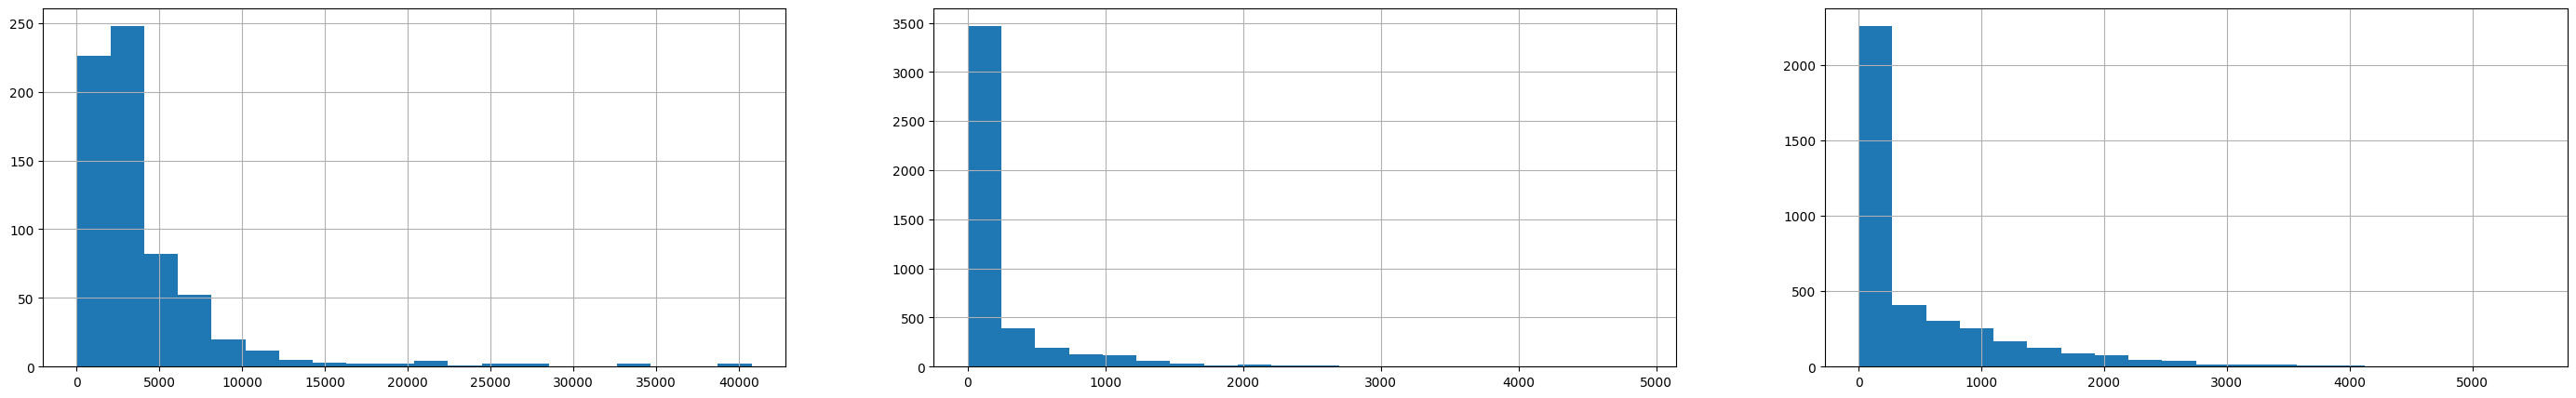

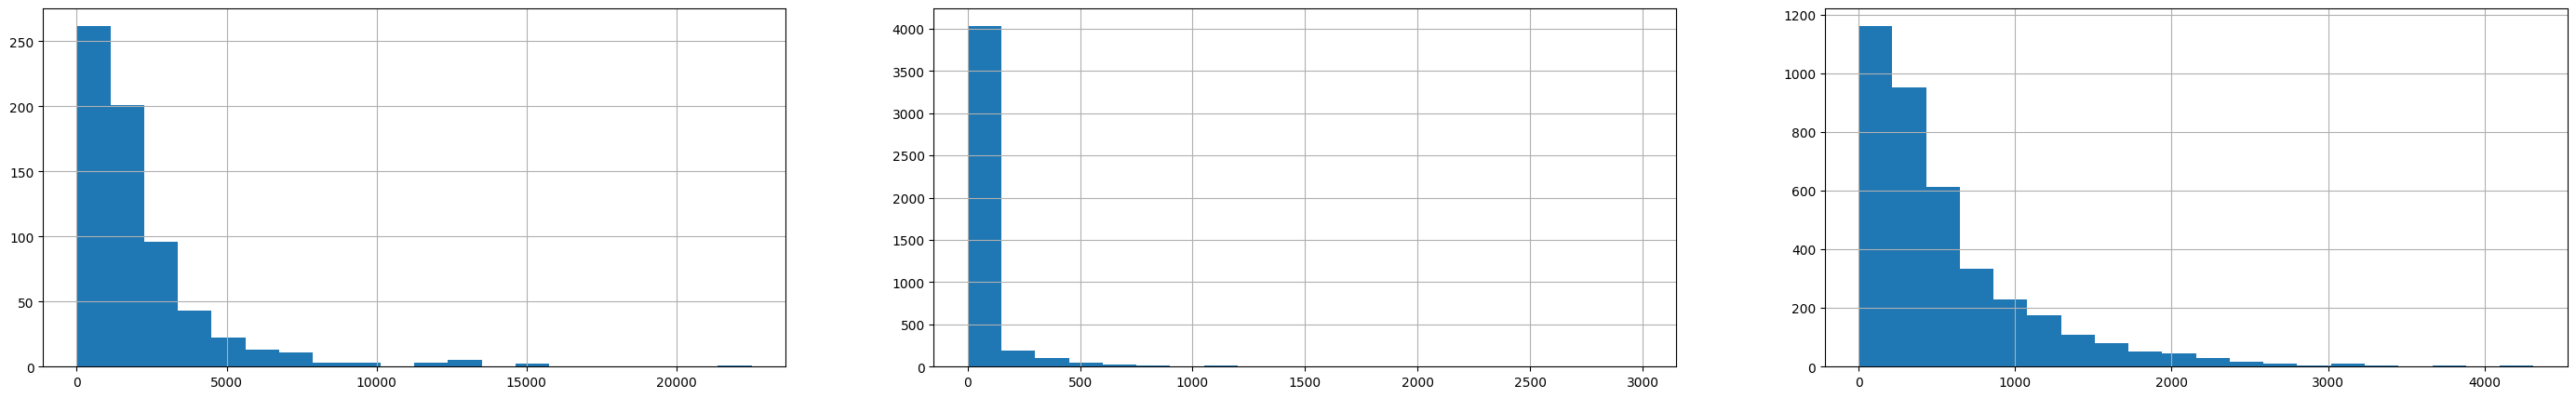

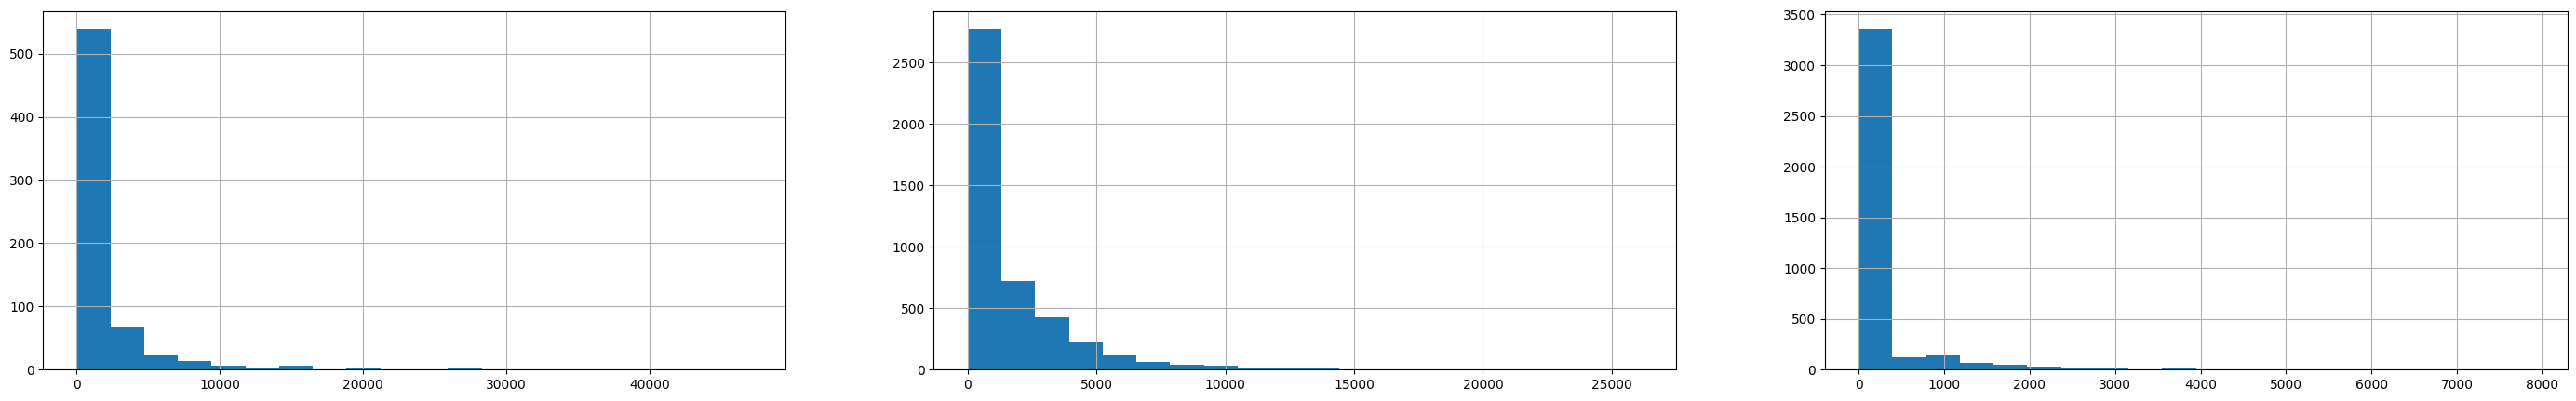

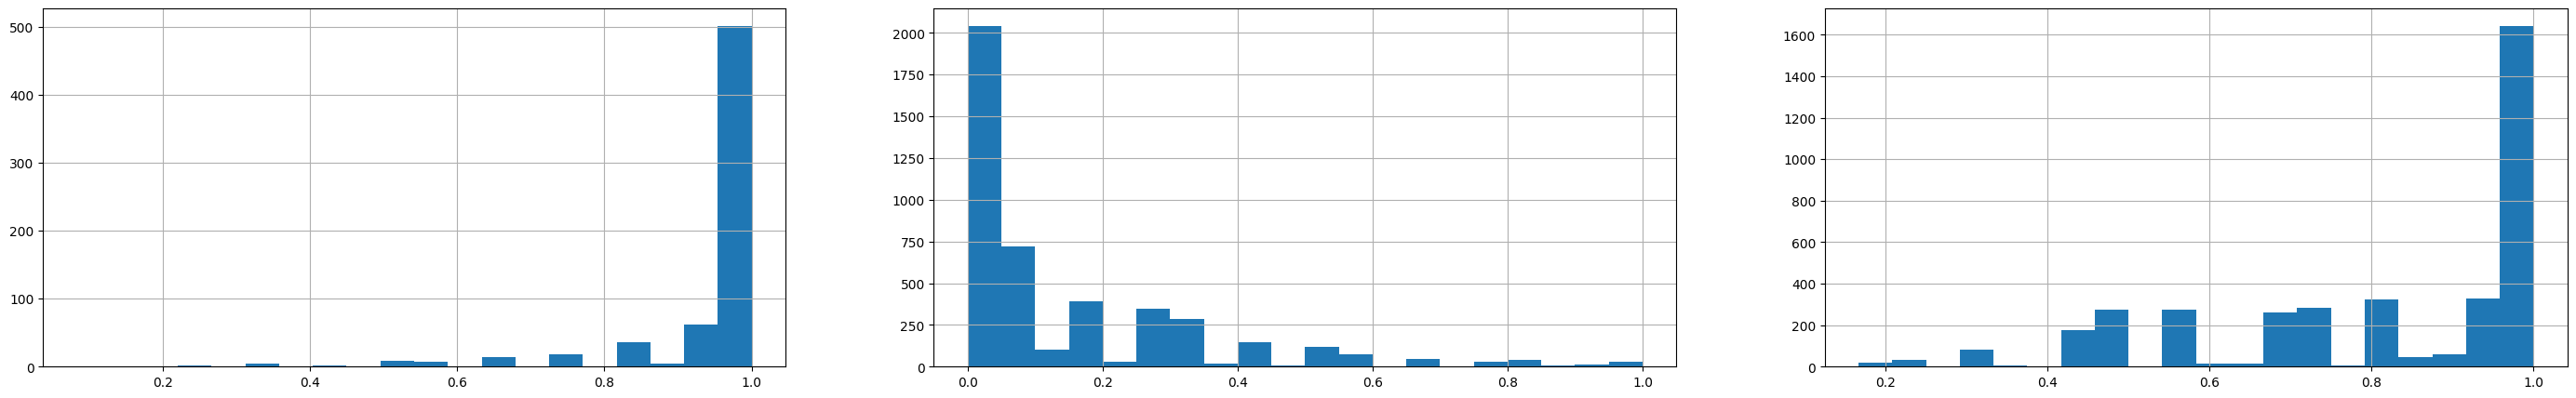

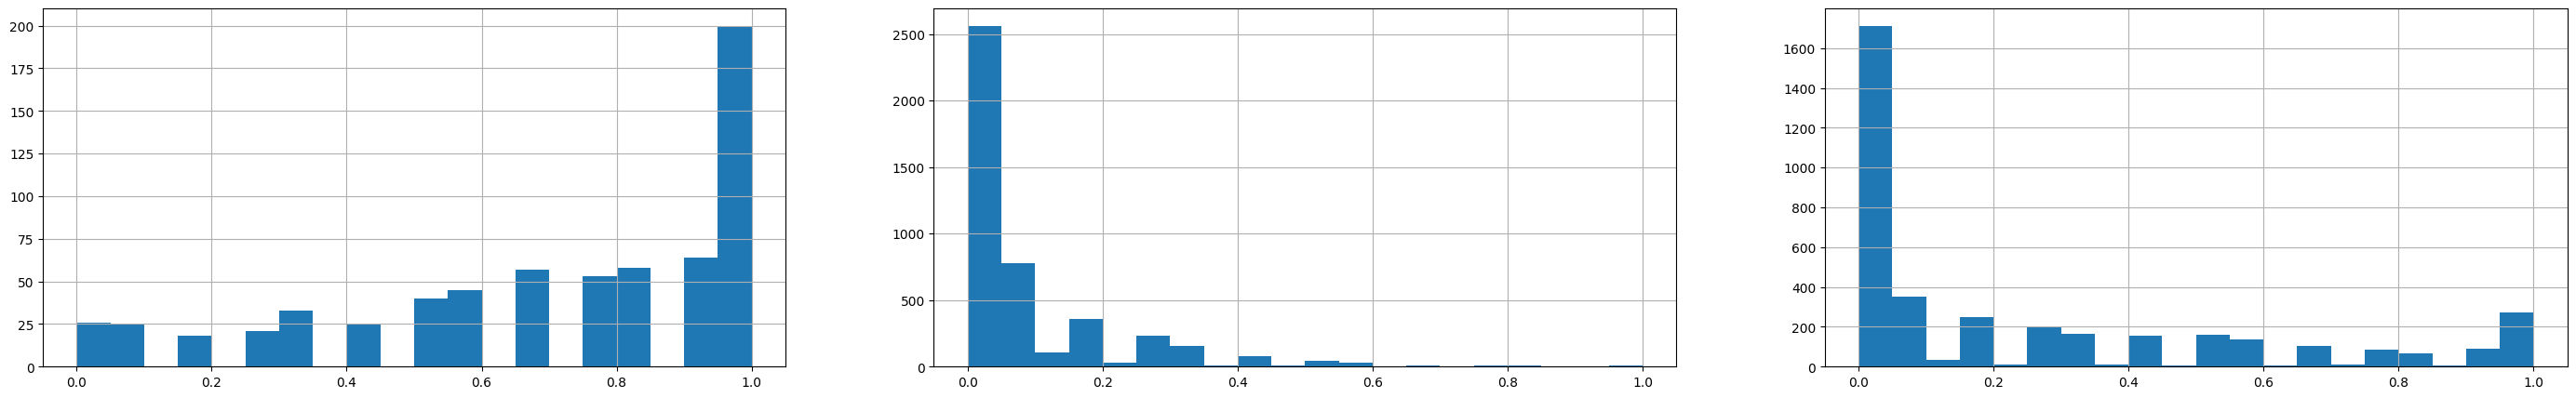

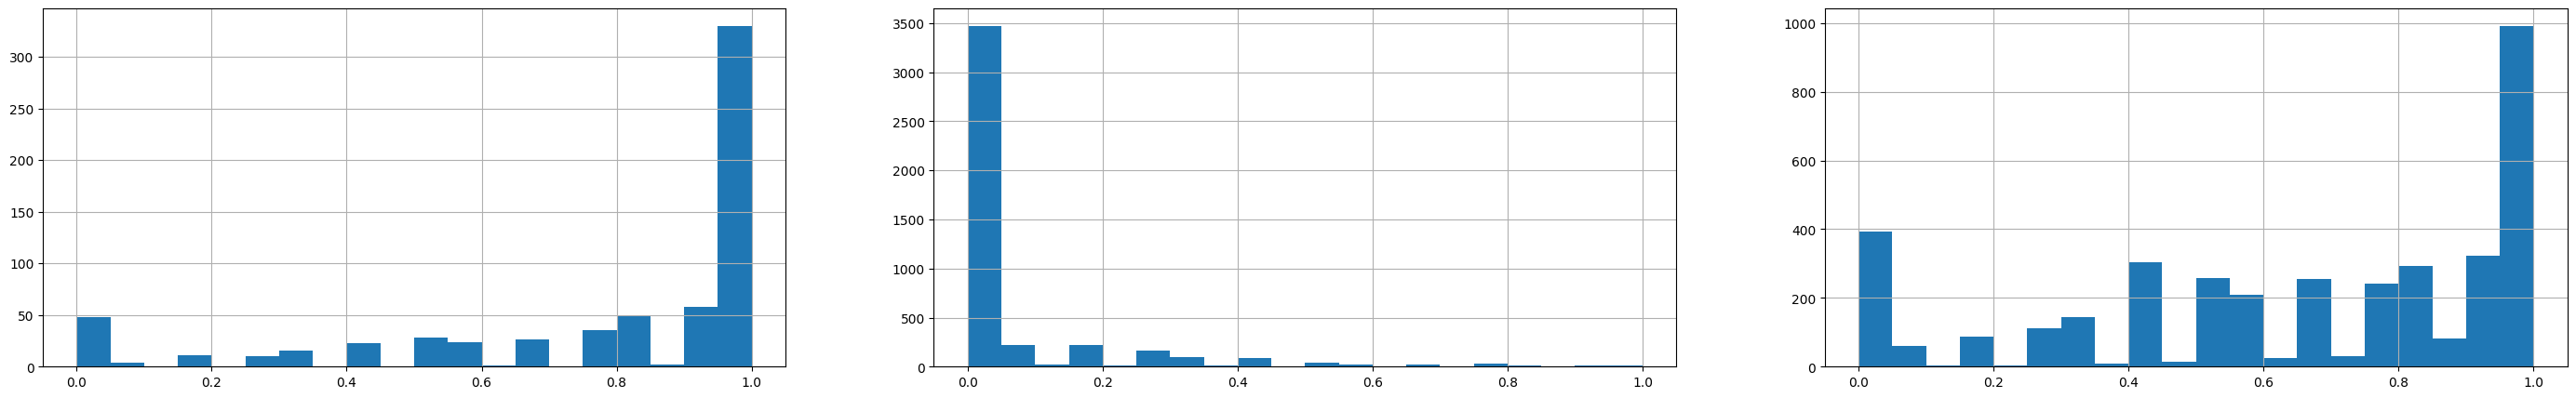

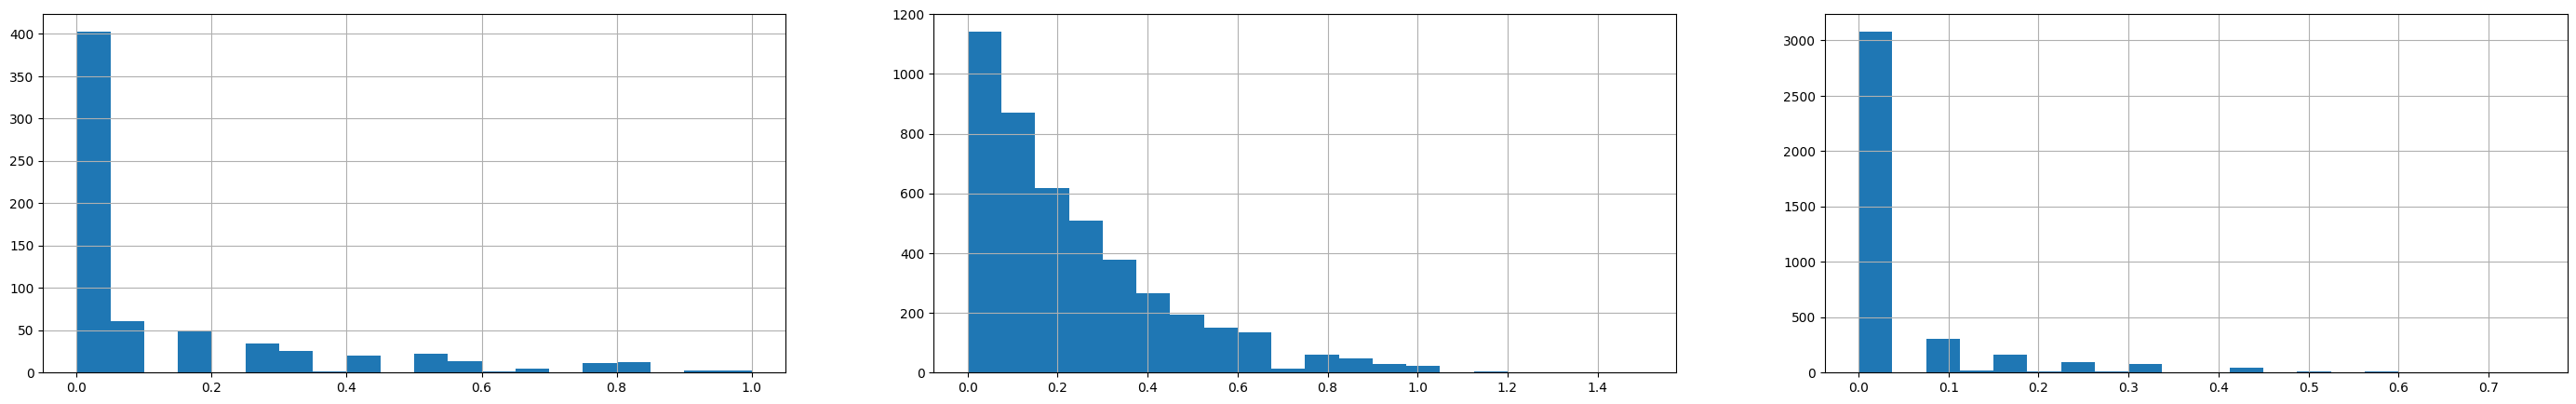

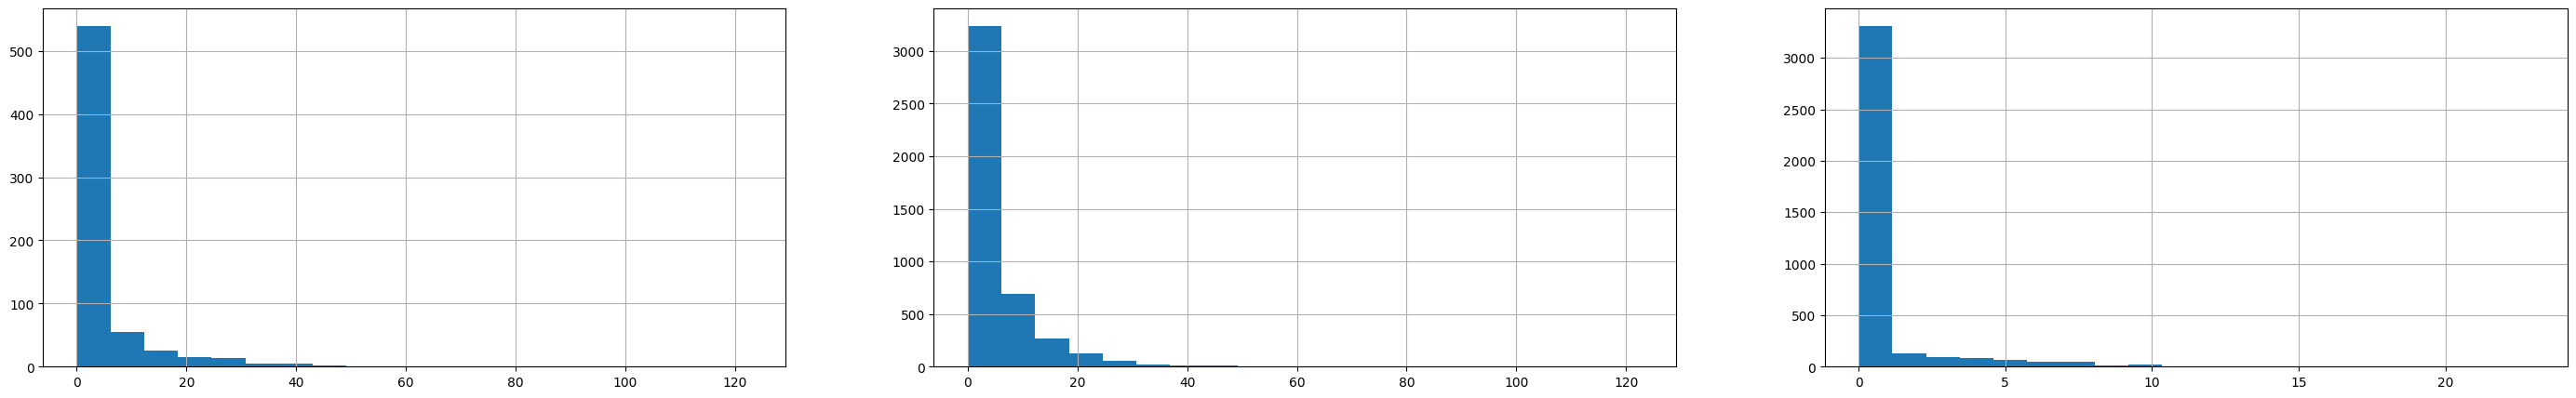

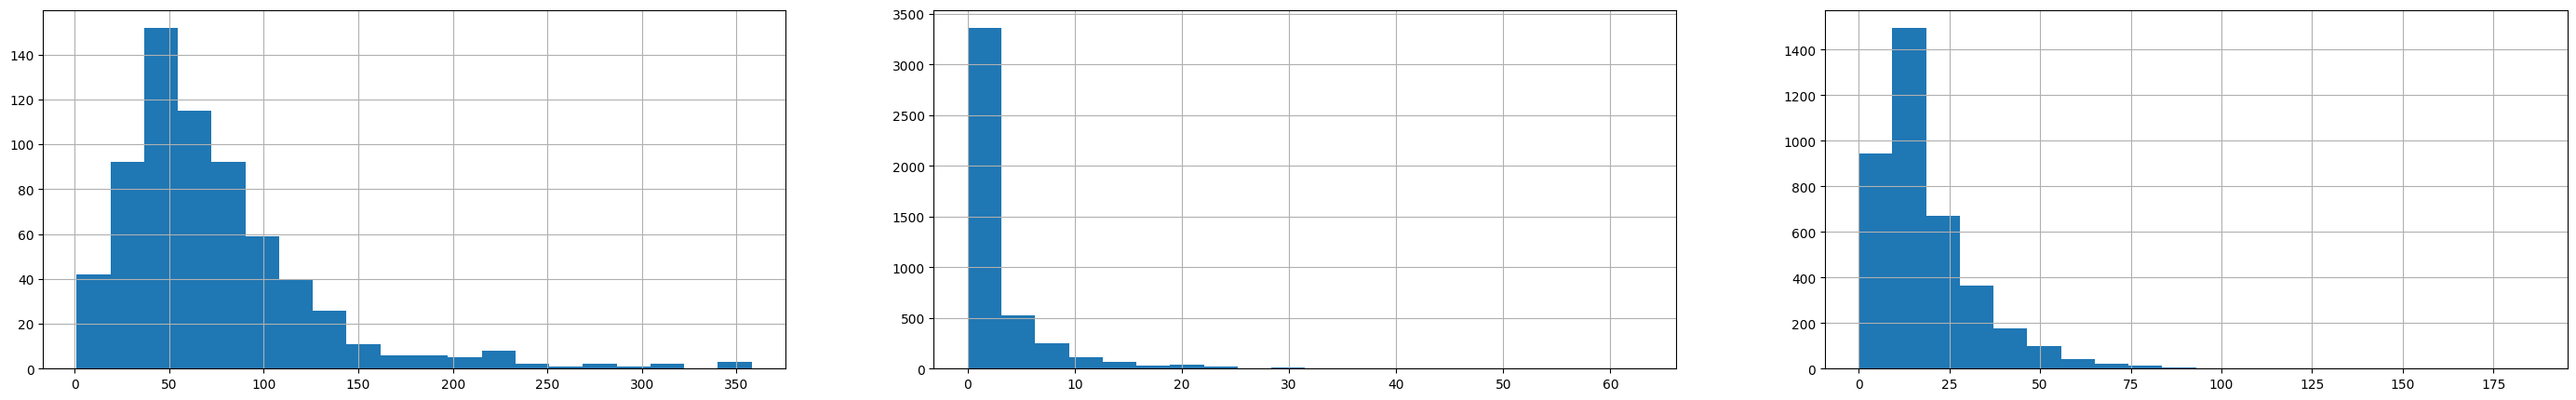

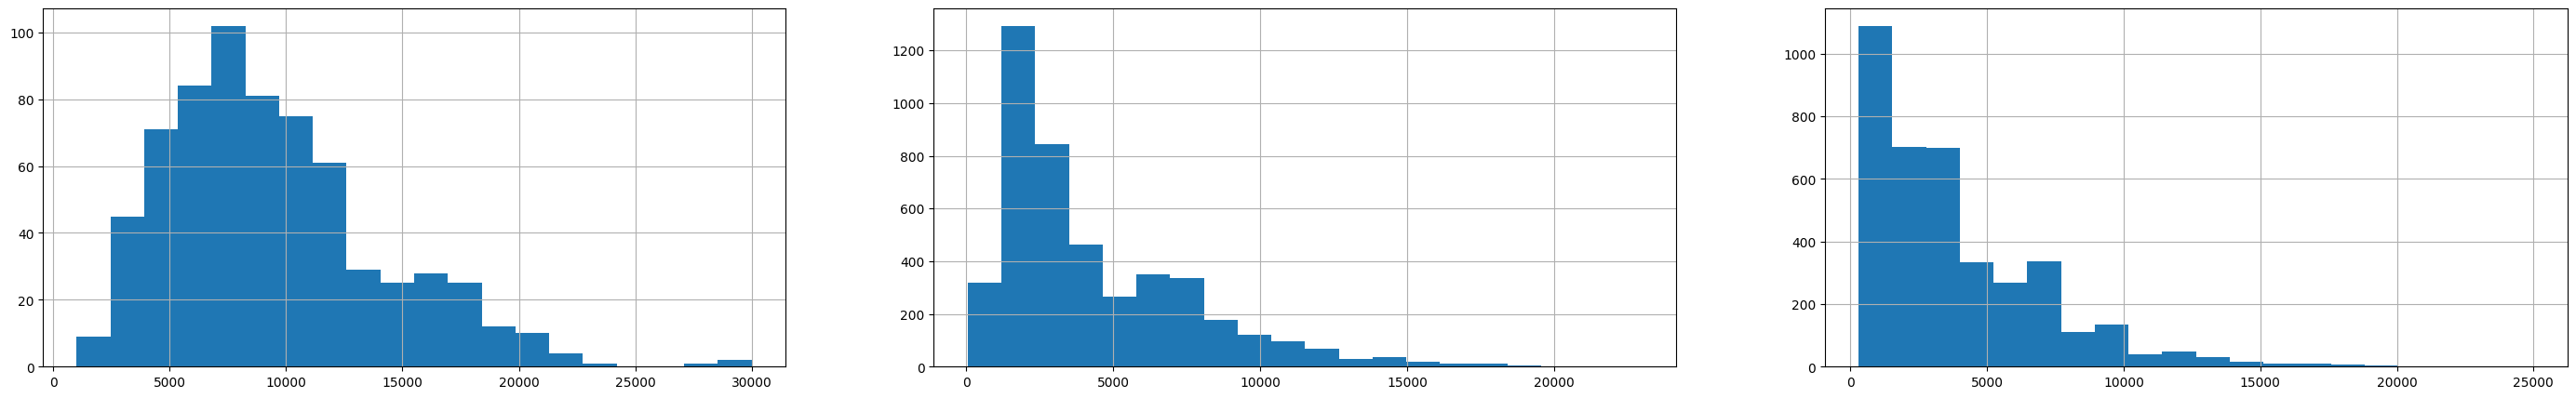

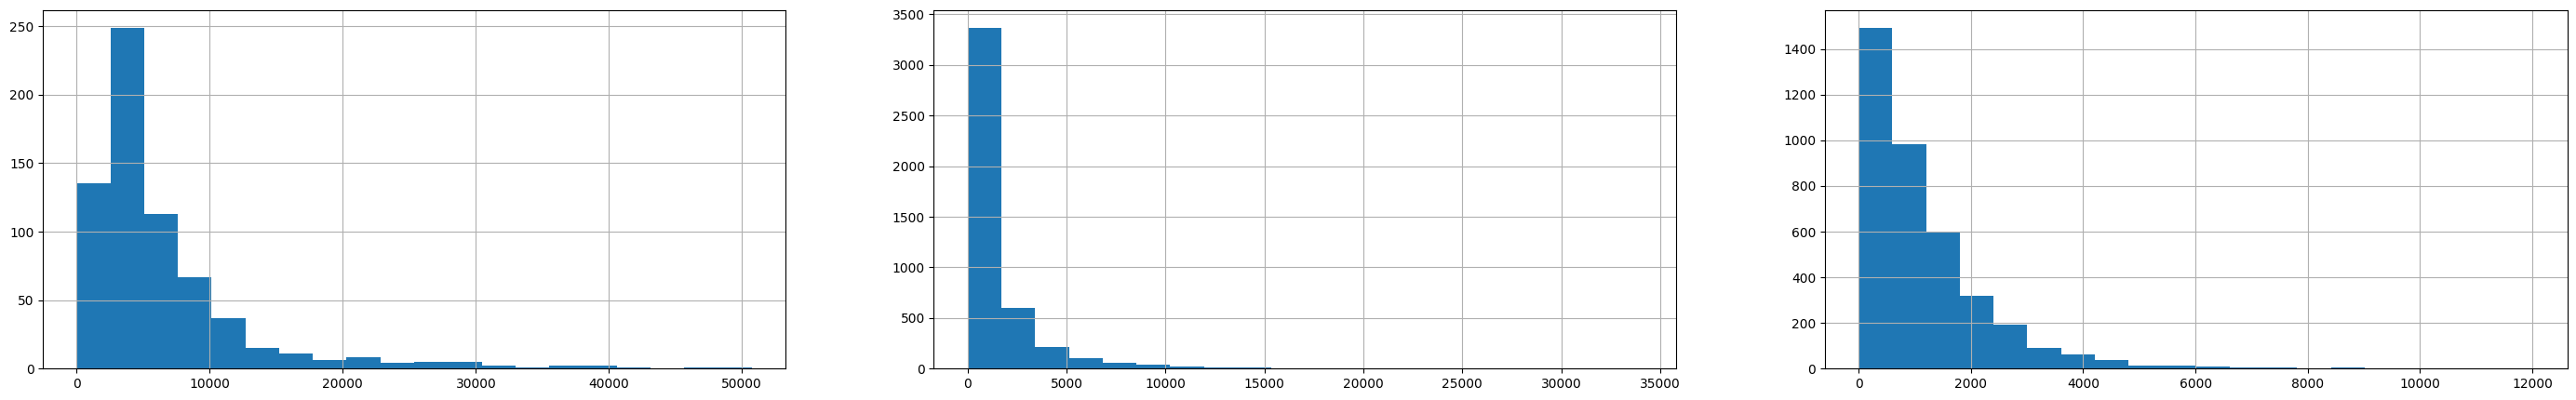

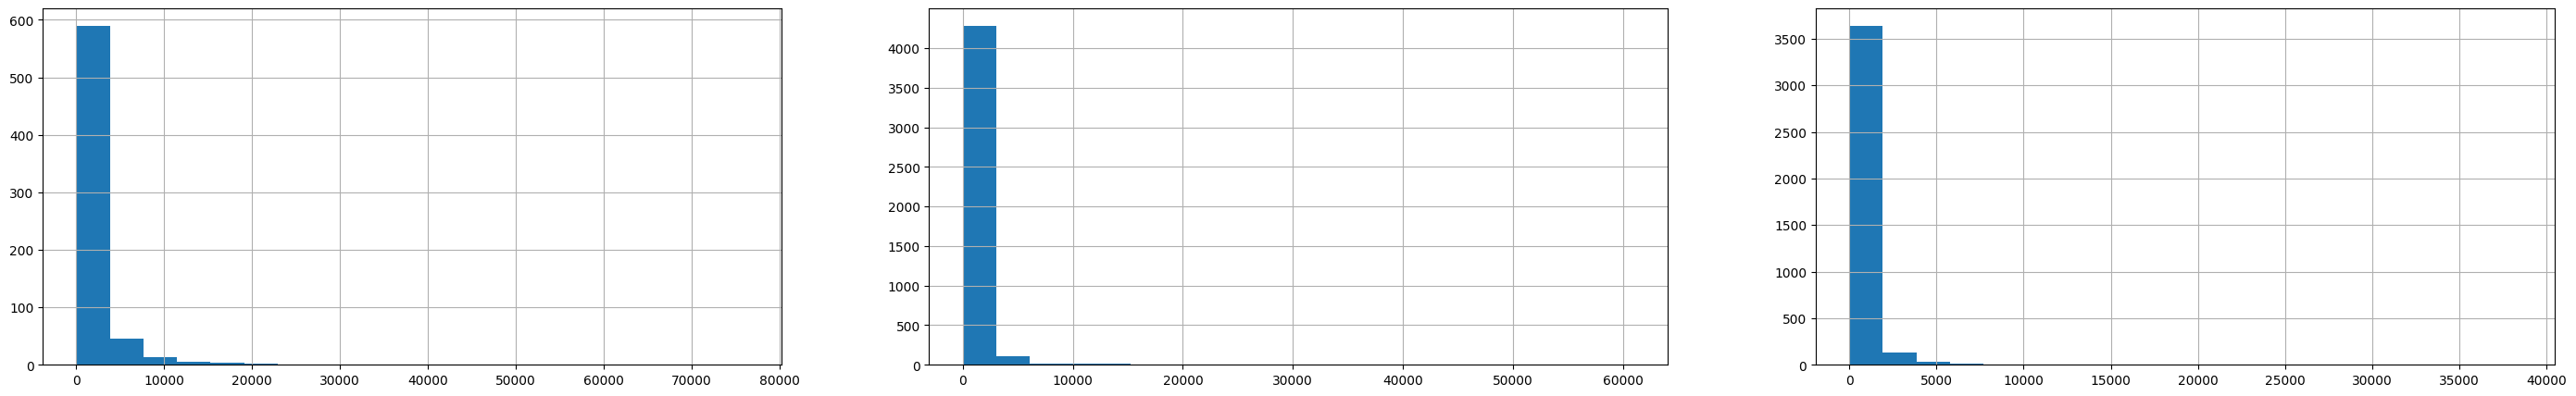

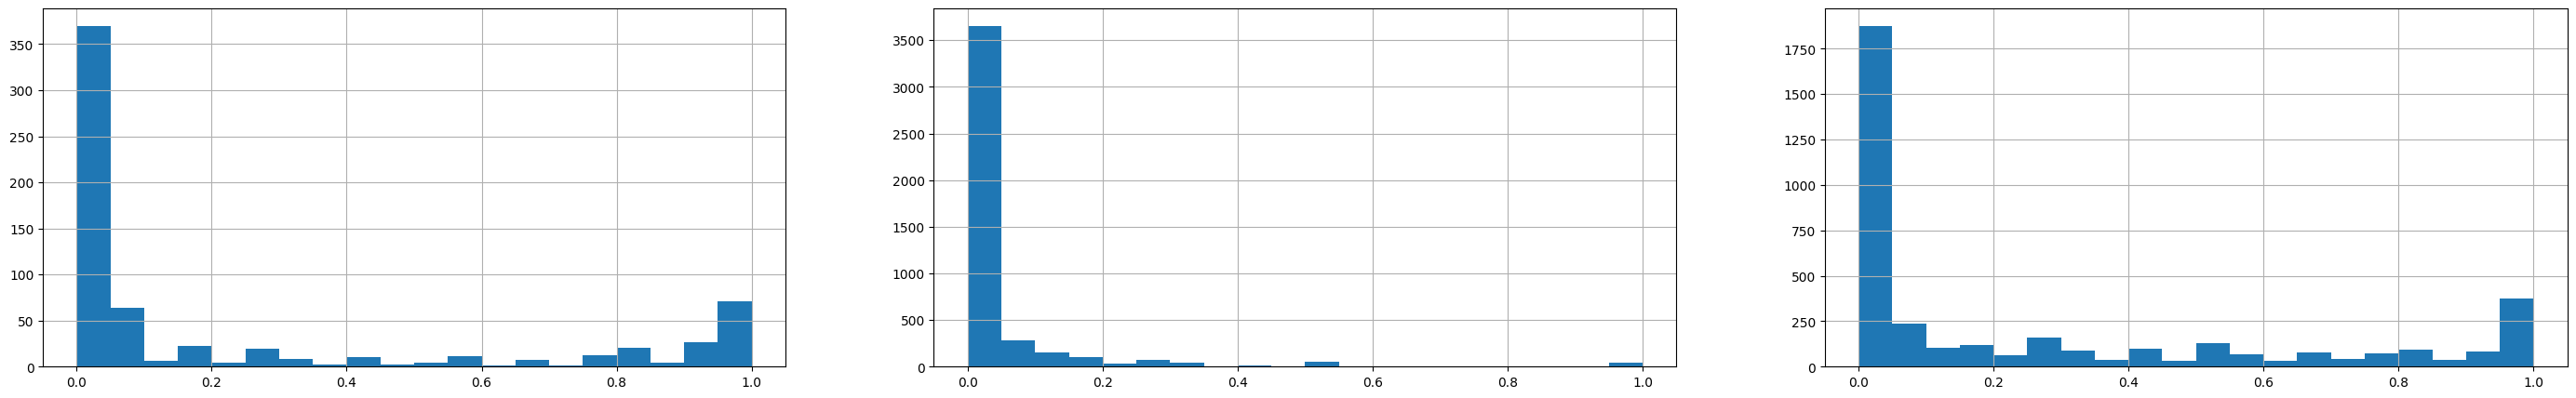

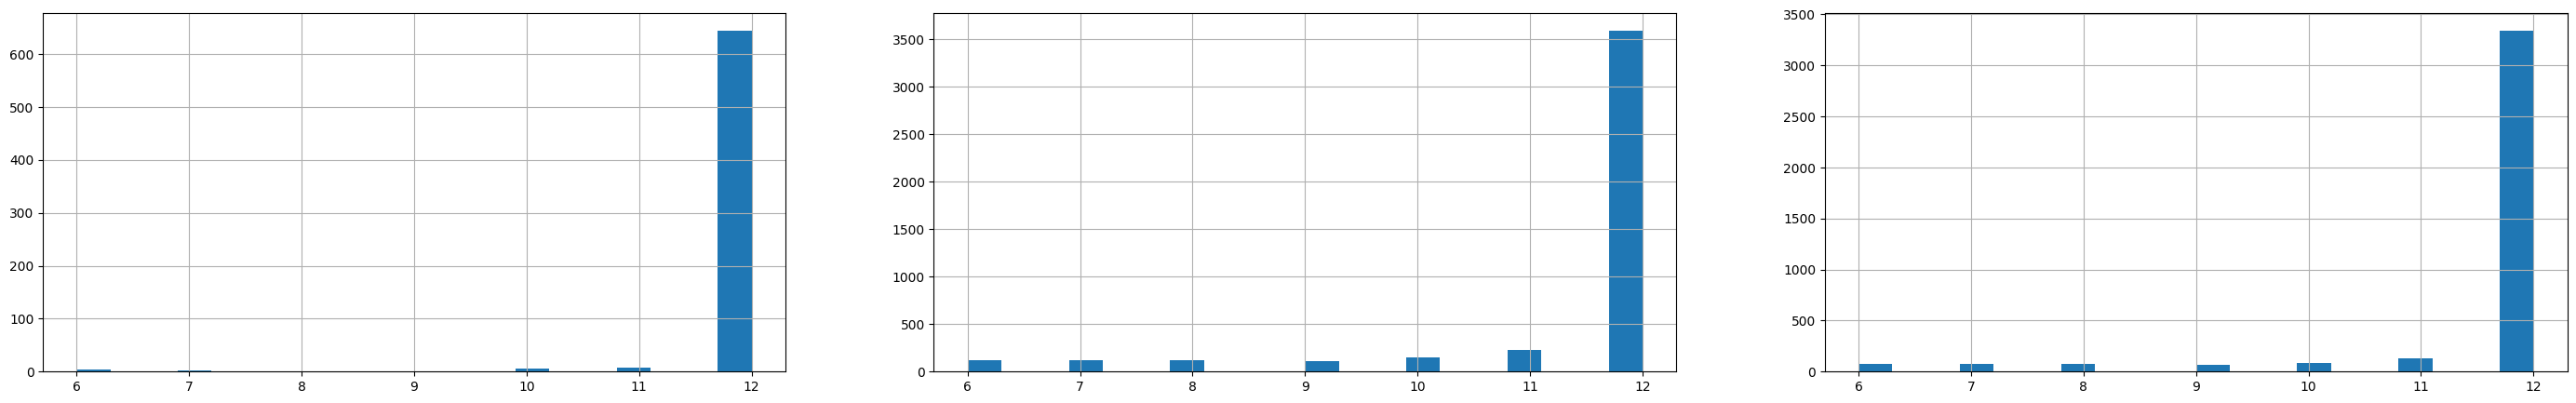

In [40]:
##plot histogram

for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
  plt.show()

In [41]:
# Reduce to 2 dimensions for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(creditcard_df_s)

creditcard_df_cluster['pca1'] = pca_components[:,0]
creditcard_df_cluster['pca2'] = pca_components[:,1]


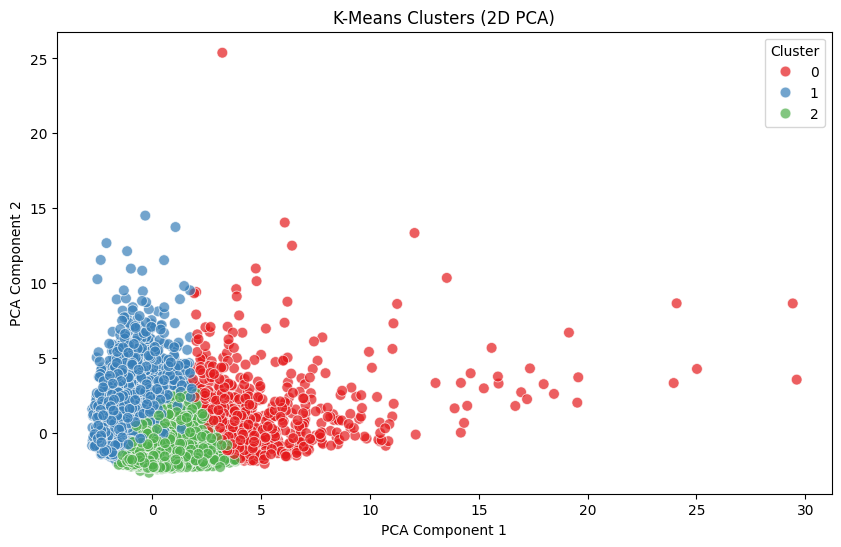

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster',
    palette='Set1',
    data=creditcard_df_cluster,
    s=60,
    alpha=0.7
)
plt.title('K-Means Clusters (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [43]:
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,pca1,pca2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,-1.682243,-1.076391
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,-1.138206,2.506525
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,0.969712,-0.383516
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,-0.873597,0.043193
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,-1.599443,-0.688515


In [44]:
creditcard_df_cluster.shape

(8950, 20)

In [45]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [53]:
# Read csv file
creditcard_df_2= pd.read_csv('/content/CC GENERAL.csv')
creditcard_df_2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [54]:
creditcard_CUSID = creditcard_df_2['CUST_ID']
creditcard_CUSID.head()


,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


In [55]:
df= pd.concat([creditcard_CUSID,creditcard_df_cluster],axis=1)

In [56]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,pca1,pca2
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,1,-1.682243,-1.076391
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,-1.138206,2.506525
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,2,0.969712,-0.383516
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,864.206542,0.000000,12,1,-0.873597,0.043193
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1,-1.599443,-0.688515


In [60]:
# Getting each clusture in its own dataframe

cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]

In [62]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)


(665, 21)
(4450, 21)
(3835, 21)


In [64]:
cluster_0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,pca1,pca2
count,665.000000,665.000000,665.000000,665.00000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.0,665.000000,665.000000
mean,3591.838396,0.983751,5957.836632,3901.62594,2057.112947,1466.471112,0.945155,0.695678,0.778225,0.129640,4.037594,73.203008,9400.601504,6483.115198,2024.843951,0.245549,11.912782,0.0,5.276804,1.066595
std,3340.583528,0.073543,5216.365419,4553.45709,2310.217824,3778.275545,0.130684,0.306596,0.312789,0.219817,9.417049,50.919787,4646.851629,6473.882583,5099.672167,0.372011,0.602382,0.0,3.329432,2.588385
min,12.659909,0.090909,18.350000,0.00000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,29.259869,0.000000,6.000000,0.0,1.877891,-2.081788
25%,877.354533,1.000000,3398.120000,1540.41000,688.380000,0.000000,1.000000,0.500000,0.666667,0.000000,0.000000,41.000000,6000.000000,2823.945882,256.820140,0.000000,12.000000,0.0,3.500280,-0.669384
50%,2629.928623,1.000000,4587.210000,2847.80000,1484.130000,0.000000,1.000000,0.750000,0.916667,0.000000,0.000000,62.000000,8500.000000,4522.486550,794.323892,0.000000,12.000000,0.0,4.292427,0.278765
75%,5220.637076,1.000000,6558.550000,4534.03000,2643.830000,1437.475493,1.000000,1.000000,1.000000,0.166667,4.000000,92.000000,12000.000000,7633.554879,1879.122243,0.416667,12.000000,0.0,5.890383,2.065794
max,19043.138560,1.000000,49039.570000,40761.25000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,0.0,29.605519,25.383740


In [65]:
cluster_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,pca1,pca2
count,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.0,4450.000000,4450.000000
mean,1935.943086,0.845802,246.647991,198.327213,48.470452,1581.013440,0.143325,0.083870,0.060655,0.219628,5.309438,2.671910,4238.102145,1515.249344,928.400320,0.039929,11.397978,1.0,-1.306186,0.829603
std,2154.824371,0.269454,467.531979,432.849946,160.048316,2334.679618,0.200805,0.140418,0.148490,0.223996,8.187822,4.851376,3367.341493,2404.664945,2153.458350,0.127230,1.464971,0.0,0.744229,1.839416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.055880,0.000000,6.000000,1.0,-2.764716,-1.985935
25%,383.988994,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,329.230176,216.337824,0.000000,12.000000,1.0,-1.815093,-0.467039
50%,1232.319137,1.000000,39.270000,0.000000,0.000000,709.229044,0.083333,0.000000,0.000000,0.166667,3.000000,1.000000,3000.000000,714.561418,476.571438,0.000000,12.000000,1.0,-1.487964,0.353961
75%,2672.147223,1.000000,282.692500,194.900000,0.000000,2235.804118,0.250000,0.090909,0.000000,0.333333,7.000000,3.000000,6000.000000,1657.281669,935.398976,0.000000,12.000000,1.0,-0.974200,1.686277
max,15258.225900,1.000000,4900.000000,4900.000000,3000.000000,26194.049540,1.000000,1.000000,1.000000,1.500000,123.000000,63.000000,23000.000000,34107.074990,61031.618600,1.000000,12.000000,1.0,1.901745,14.500458


In [66]:
cluster_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,pca1,pca2
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.0,3835.000000,3835.000000
mean,781.885382,0.895322,1021.939593,475.926237,546.383781,195.614957,0.814162,0.254537,0.645184,0.038066,0.720991,18.535332,3940.775381,1162.322370,588.460469,0.269824,11.587223,2.0,0.600640,-1.147593
std,1143.137507,0.205836,875.789820,727.673428,560.350852,626.556763,0.213869,0.327654,0.332460,0.095766,2.032948,13.770418,3073.717073,1140.311196,1574.267505,0.356329,1.256550,0.0,1.047266,0.810440
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000,2.0,-1.542803,-2.680421
25%,57.852811,0.909091,363.280000,0.000000,171.330000,0.000000,0.666667,0.000000,0.416667,0.000000,0.000000,10.000000,1500.000000,390.404310,150.070484,0.000000,12.000000,2.0,-0.184694,-1.721253
50%,255.851136,1.000000,721.780000,100.000000,378.350000,0.000000,0.916667,0.083333,0.750000,0.000000,0.000000,13.000000,3000.000000,806.703752,189.395585,0.083333,12.000000,2.0,0.438990,-1.290118
75%,1118.036744,1.000000,1450.080000,720.600000,740.135000,0.000000,1.000000,0.416667,1.000000,0.000000,0.000000,24.000000,5525.000000,1571.403900,523.928209,0.500000,12.000000,2.0,1.265476,-0.763857
max,9919.456275,1.000000,5744.030000,5497.040000,4313.220000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000,2.0,3.854100,3.191754


In [71]:
insight_table = df.drop(columns=['CUST_ID']).groupby('cluster').mean().round(2)


In [72]:
insight_table

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pca1,pca2
cluster,,,,,,,,,,,,,,,,,,,
0,3591.84,0.98,5957.84,3901.63,2057.11,1466.47,0.95,0.70,0.78,0.13,4.04,73.20,9400.60,6483.12,2024.84,0.25,11.91,5.28,1.07
1,1935.94,0.85,246.65,198.33,48.47,1581.01,0.14,0.08,0.06,0.22,5.31,2.67,4238.10,1515.25,928.40,0.04,11.40,-1.31,0.83
2,781.89,0.90,1021.94,475.93,546.38,195.61,0.81,0.25,0.65,0.04,0.72,18.54,3940.78,1162.32,588.46,0.27,11.59,0.60,-1.15


## **Compare Cluster for each Feature**

In [74]:
# Focused features for marketing
features = [
    'BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE',
    'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'
]

cluster_profile = insight_table[features]
cluster_profile


,BALANCE,CREDIT_LIMIT,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT
cluster,,,,,,,,,
0,3591.84,9400.60,5957.84,3901.63,2057.11,0.95,1466.47,0.13,0.25
1,1935.94,4238.10,246.65,198.33,48.47,0.14,1581.01,0.22,0.04
2,781.89,3940.78,1021.94,475.93,546.38,0.81,195.61,0.04,0.27


Cluster 0: Big Spenders
- High balance & credit limit
- Frequent one-off purchases
- Low cash advance usage
Marketing: premium cards, loyalty rewards, installment campaigns

Cluster 1: Liquidity Seekers
- Low purchases but high cash advance
- Rarely pay full balance
Marketing: low-interest credit, cash advance tips, re-engagement offers

Cluster 2: Planned Buyers
- Moderate purchases, mix of one-off & installment
- Low cash advance
Marketing: loyalty points, bundle offers, upselling campaigns

